# Visualization to explore semantic segmentation datasets


## Into the `mmsegmentation` home directory

In [1]:
import os
os.chdir('mmsegmentation')

In [2]:
os.getcwd()

'/home/featurize/work/CFA/mmsegmentation'

## Import Toolkit

In [15]:
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

## View a single image and its semantic segmentation annotation

In [16]:
# Specify the path of a single image
img_path = 'CFA87_Semantic_Seg_Labelme/img_dir/train/cfa13.jpg'
mask_path = 'CFA87_Semantic_Seg_Labelme/ann_dir/train/cfa13.png'

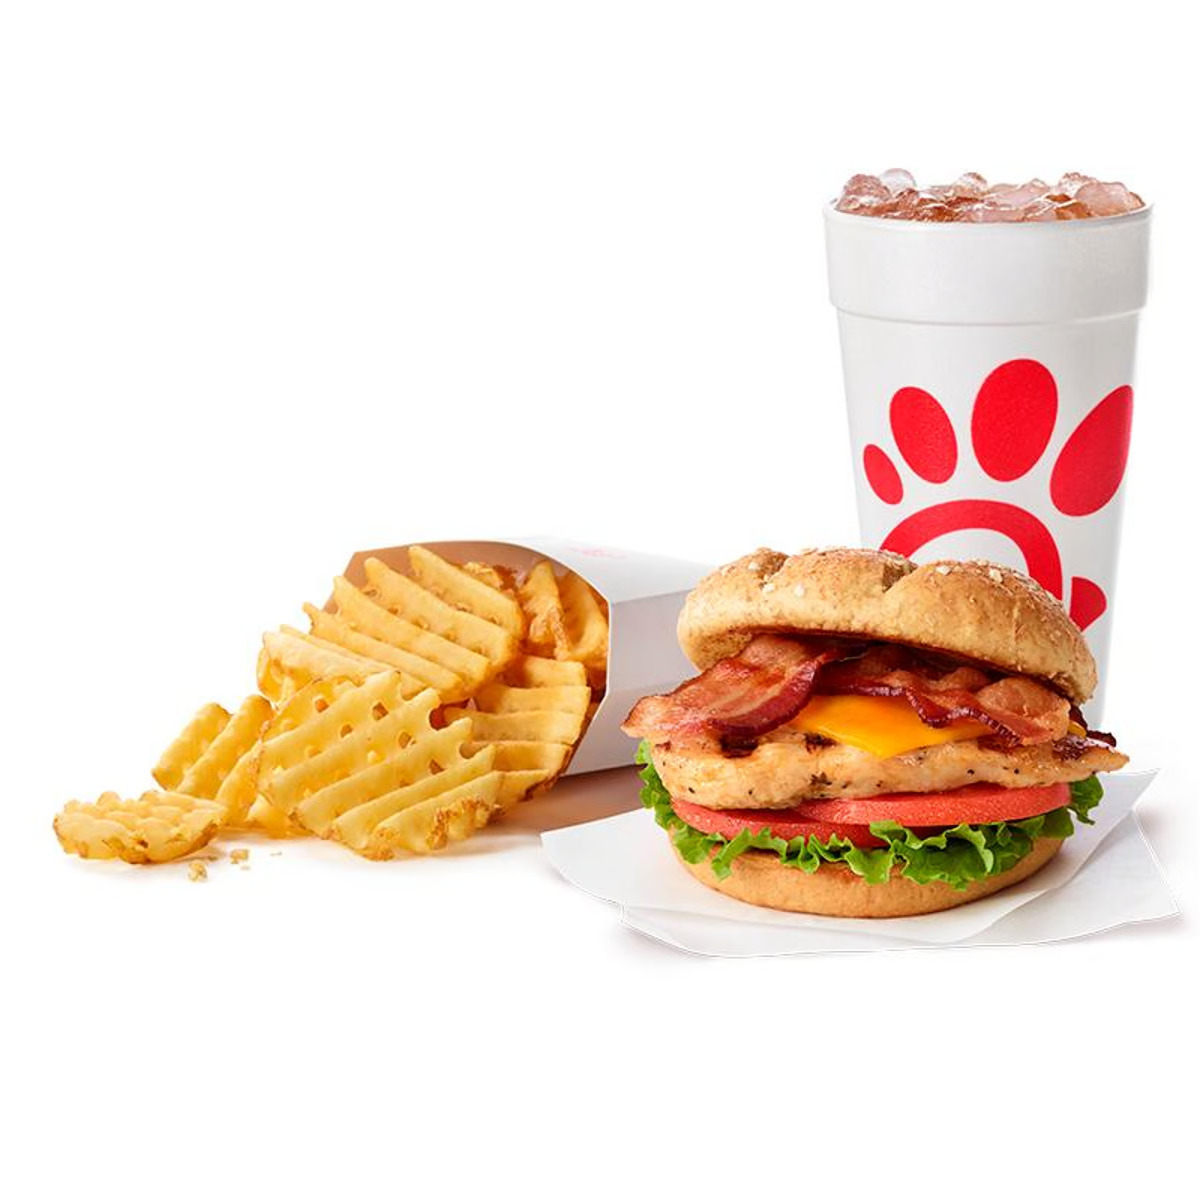

In [17]:
Image.open(img_path)

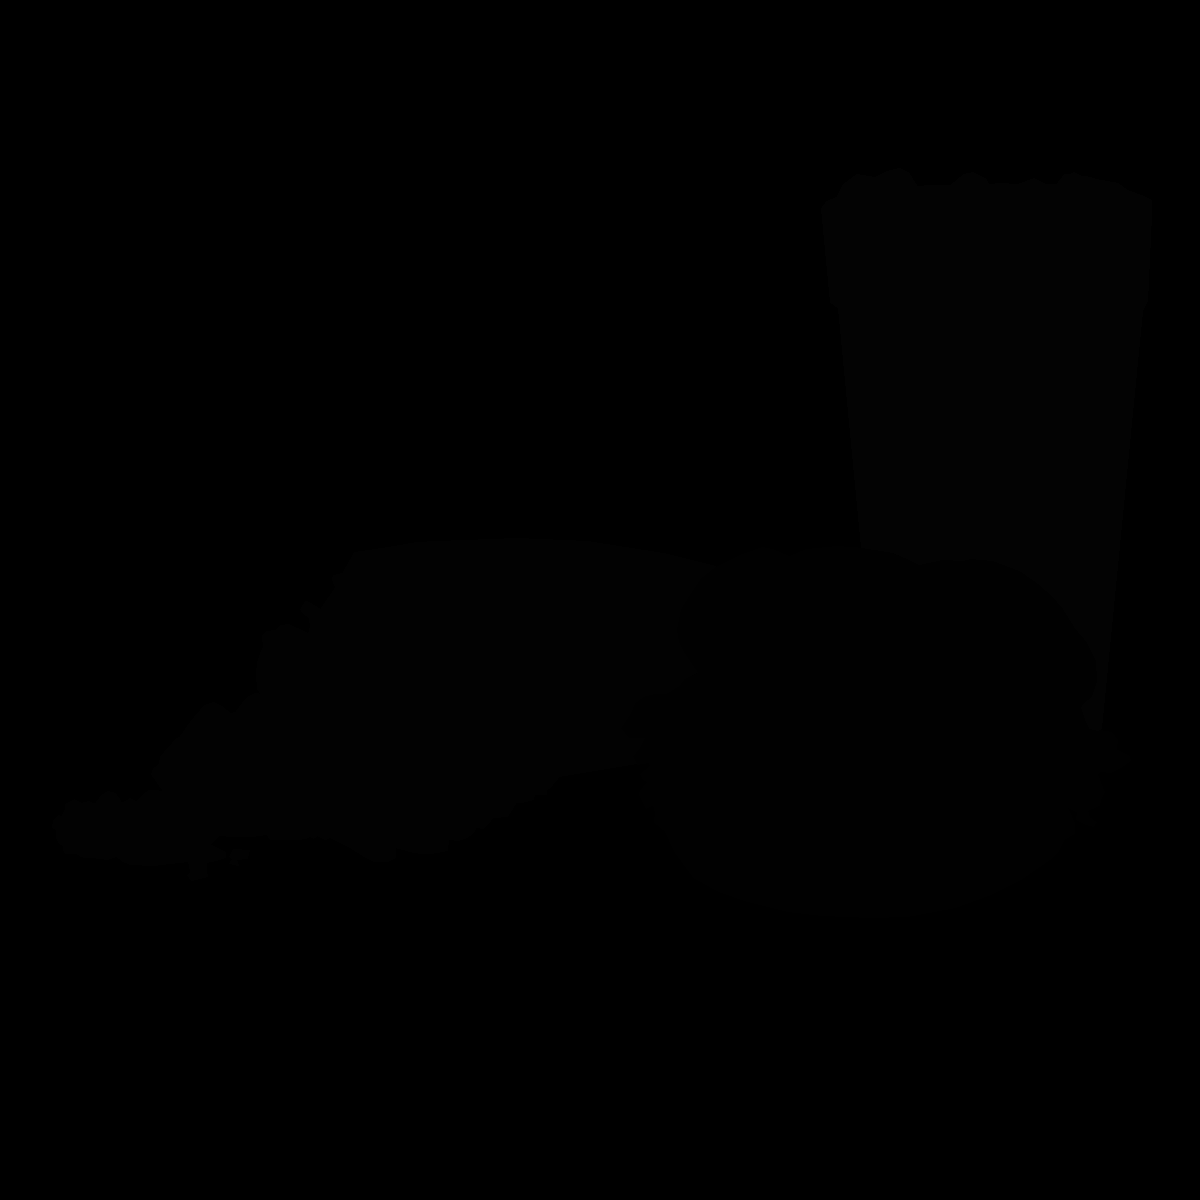

In [18]:
Image.open(mask_path)

In [19]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

In [20]:
img.shape

(1200, 1200, 3)

## mask grayscale map labeling meaning

In [22]:
# mask semantic segmentation annotation, same size as the original image
np.unique(mask)

array([0, 1, 2, 3], dtype=uint8)

| label   | semantic        | type        | color        |
| ---------- | --------     | --------    | ------------ |
| /          | background   | /           | 0            |
| sandwich   | sandwich     | polygon     | 1            |
| fries      | fries        | polygon     | 2            |
| drink      | drink        | polygon     | 3            |

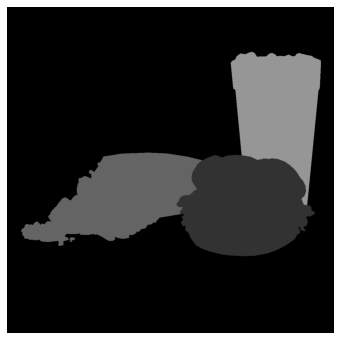

In [23]:
plt.figure(figsize=(10, 6))
plt.imshow(mask*50)
plt.axis('off')
plt.show()

## Display semantic segmentation annotations superimposed on the original image


In [38]:
# BGR color for each category
palette = [
    ['background', [127,127,127]],
    ['sandwich', [0,0,200]],
    ['fries', [0,200,0]],
    ['drink', [200,0,0]]
]

In [39]:
palette_dict = {}
for idx, each in enumerate(palette):
    palette_dict[idx] = each[1]

In [40]:
palette_dict

{0: [127, 127, 127], 1: [0, 0, 200], 2: [0, 200, 0], 3: [200, 0, 0]}

In [42]:
mask = mask[:,:,0]
# Map integer ID to corresponding category color
viz_mask_bgr = np.zeros((mask.shape[0], mask.shape[1], 3))
for idx in palette_dict.keys():
    viz_mask_bgr[np.where(mask==idx)] = palette_dict[idx]
viz_mask_bgr = viz_mask_bgr.astype('uint8')

# Superimpose the semantic segmentation mask on the original image
opacity = 0.02 # Higher opacity makes the visualization closer to the original image
label_viz = cv2.addWeighted(img, opacity, viz_mask_bgr, 1-opacity, 0)

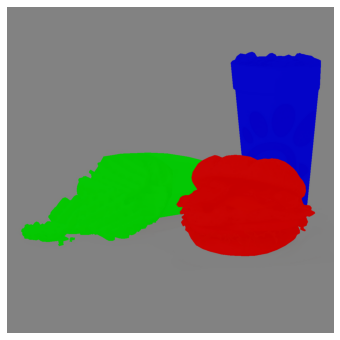

In [43]:
plt.figure(figsize=(10, 6))
plt.imshow(label_viz[:,:,::-1])
plt.axis('off')
plt.show()

In [44]:
cv2.imwrite('outputs/D-1.jpg', label_viz)

True

## Batch visualization of images and annotations

In [45]:
# Specify image and annotation paths

# Training set
PATH_IMAGE = 'CFA87_Semantic_Seg_Labelme/img_dir/train'
PATH_MASKS = 'CFA87_Semantic_Seg_Labelme/ann_dir/train'

# Test set
# PATH_IMAGE = 'CFA87_Semantic_Seg_Labelme/img_dir/val'
# PATH_MASKS = 'CFA87_Semantic_Seg_Labelme/ann_dir/val'

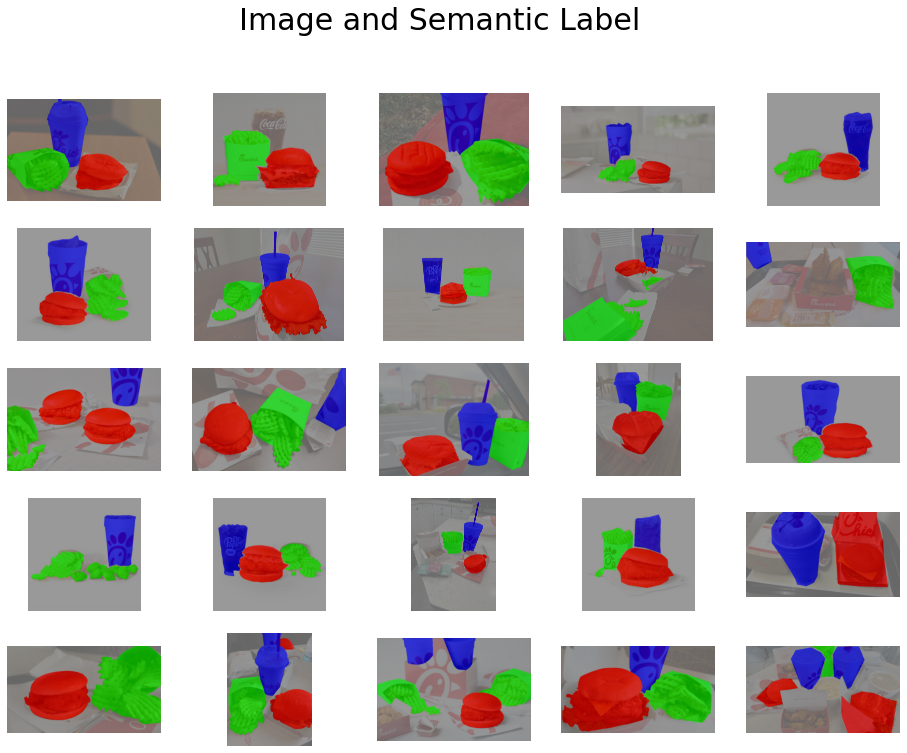

In [46]:
# n x n visualization
n = 5

# Higher opacity makes the visualization closer to the original image
opacity = 0.2 

fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(16, 12))

for i, file_name in enumerate(os.listdir(PATH_IMAGE)[:n**2]):
    
    # Load image and annotation
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name.split('.')[0]+'.png')
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    mask = mask[:,:,0]

    # Map predicted integer ID to corresponding category color
    viz_mask_bgr = np.zeros((mask.shape[0], mask.shape[1], 3))
    for idx in palette_dict.keys():
        viz_mask_bgr[np.where(mask==idx)] = palette_dict[idx]
    viz_mask_bgr = viz_mask_bgr.astype('uint8')

    # Superimpose the semantic segmentation mask on the original image
    label_viz = cv2.addWeighted(img, opacity, viz_mask_bgr, 1-opacity, 0)
    
    # Visualization
    axes[i//n, i%n].imshow(label_viz[:,:,::-1])
    axes[i//n, i%n].axis('off') # Turn off axis display
fig.suptitle('Image and Semantic Label', fontsize=30)
# plt.tight_layout()
plt.savefig('outputs/D-2.jpg')
plt.show()